Exemple avec données en banane

In [30]:
pip install pot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 8.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import matplotlib.pyplot as pl
import ot
import ot.plot

In [65]:
# Génération de la loi de référence
theta = np.linspace (0 , 2* np .pi , 50)
r = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]
z = np.array ([0 ,0])
for i in r :
    for j in theta :
        x = i * np.cos (j)
        y = i * np.sin (j)
        z = np.vstack((z , np . column_stack ((x , y)) ))

In [66]:
# Génération de la loi cible
N = 501
X = -1 + 2 * np.random.rand (N)
Phi = 2 * np.pi * np.random.rand (N )
R = 0.2 * np.random.rand (N) * (1 + (1 - np.abs (X)) / 2)
Z = np.column_stack(( X + R * np . cos ( Phi ) , X **2 + R * np . sin ( Phi )))

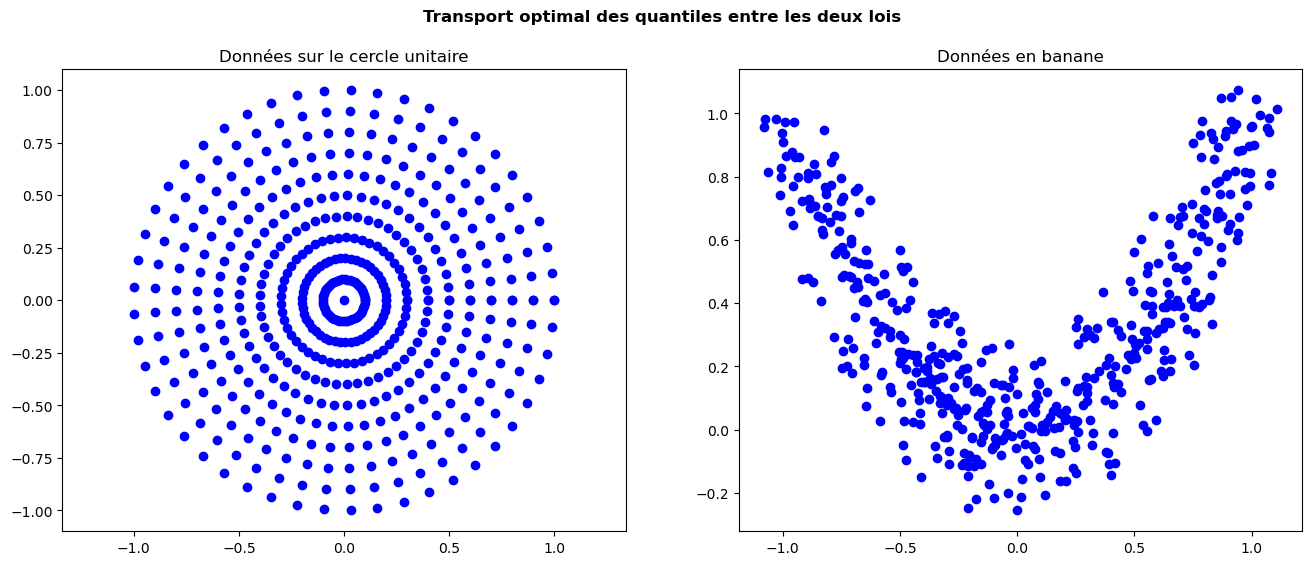

In [67]:
# Affichage des données
pl.figure( figsize =(16 ,6) )
pl.suptitle("Transport optimal des quantiles entre les deux lois", fontweight = "bold")
pl.subplot(1 , 2, 1)
pl.scatter(z [: ,0] , z [: ,1] , color = "b")
pl.title("Données sur le cercle unitaire")
pl.axis("equal")
pl.subplot(1 , 2, 2)
pl.title("Données en banane")
pl.scatter(Z [: ,0] , Z [: ,1] , color = "b")
pl.show()

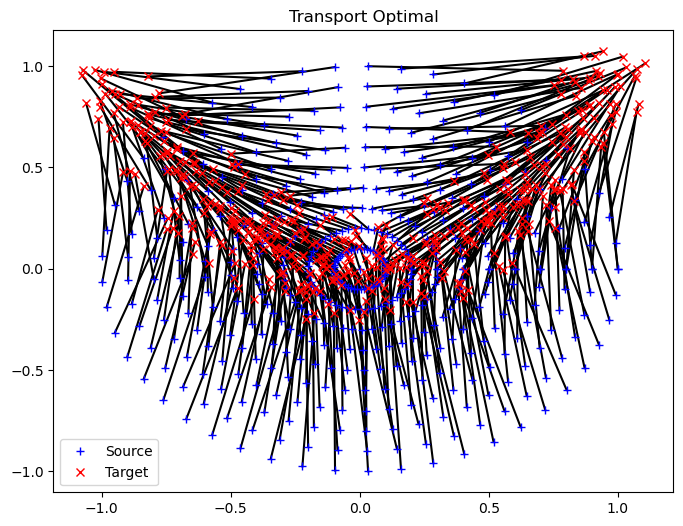

In [68]:
# Transport optimal
a , b = np.ones(N) , np.ones(N)
M = ot.dist(z , Z)
gamma = ot.emd(a , b , M)

pl.figure( figsize =(8 , 6) )
ot.plot.plot2D_samples_mat(z , Z , gamma )
pl.plot(z [: , 0] , z [: , 1] , "+ b", label = "Source")
pl.plot(Z [: , 0] , Z [: , 1] , "xr", label = "Target")
pl.title("Transport Optimal")
pl.legend()
pl.show()

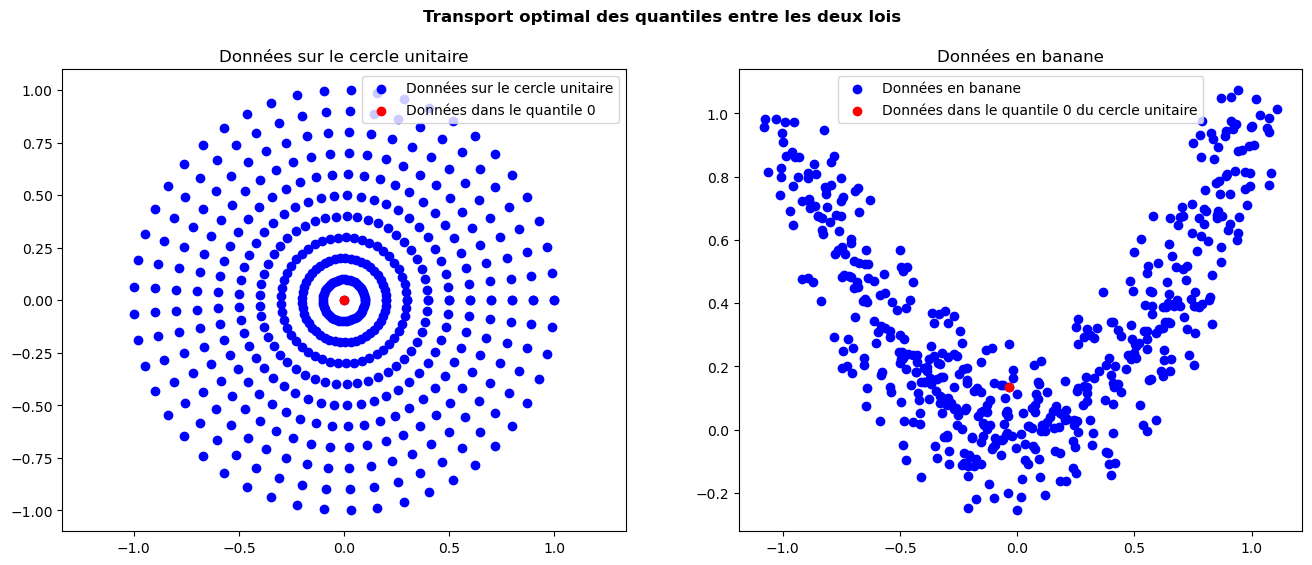

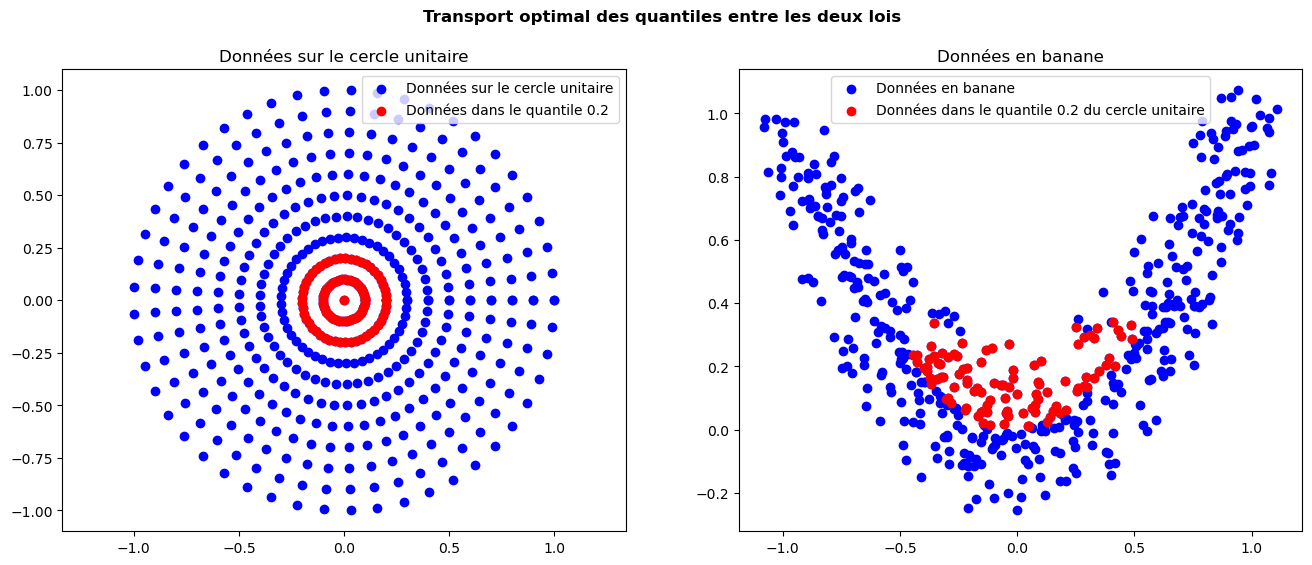

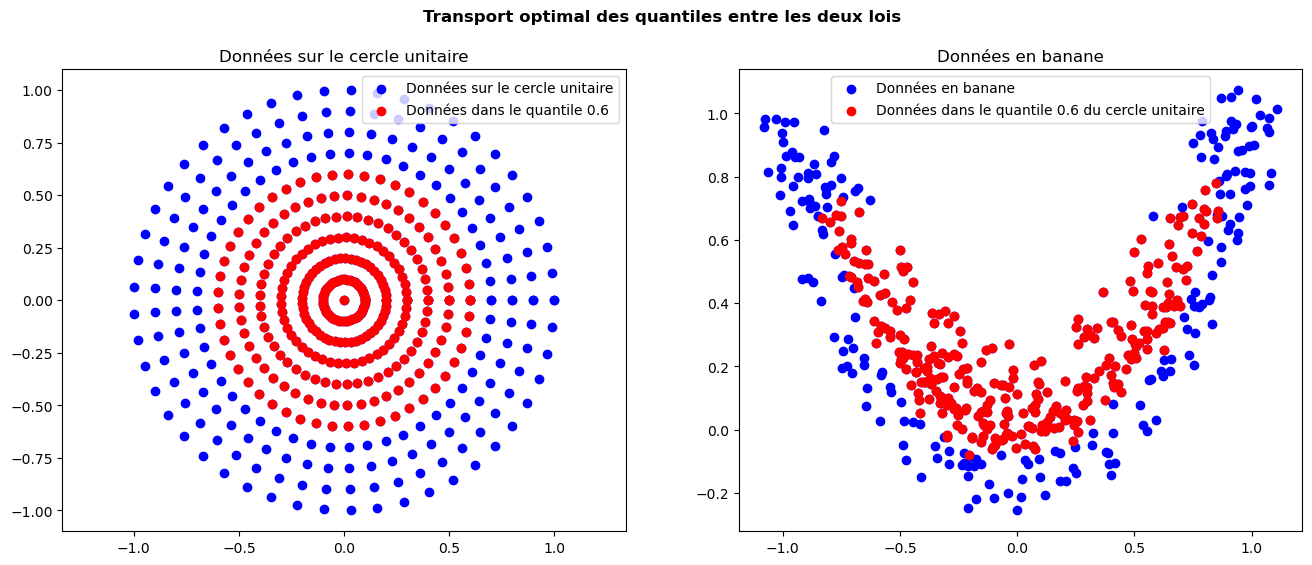

In [69]:
# Fonction pour dé terminer les quantiles de Monge
def quantile_Monge_Kant ( quantile ):

    # Lien entre les points du cercle et ceux de la banane respectant la condition sur le rayon [ indice point du cercle , indice point de la banane ]
    transport = np . argwhere ( gamma [ np . where ( np . round ( z [: , 0]**2 + z [: , 1]**2 ,5) <= quantile **2) ] == 1)

    # Données sur le cercle unitaire avec le quantile souhait é
    pl . figure ( figsize =(16 ,6) )
    pl . suptitle ("Transport optimal des quantiles entre les deux lois", fontweight = "bold")
    pl . subplot (1 , 2, 1)
    pl . scatter (z [: ,0] , z [: ,1] , color = "b")
    for i in transport [: ,0]:
        pl . scatter (z[i ,0] , z[i ,1] , color = "r")
    pl . title ("Données sur le cercle unitaire")
    pl . legend (["Données sur le cercle unitaire", f"""Données dans le quantile { quantile }"""])
    pl . axis ("equal")

# Données en banane avec le quantile du cercle unitaire souhait é
    pl . subplot (1 , 2, 2)
    pl . title ("Données en banane")
    pl . scatter (Z [: ,0] , Z [: ,1] , color = "b")
    for i in transport [: ,1]:
        pl . scatter (Z[i ,0] , Z[i ,1] , color = "r")
    pl . legend (["Données en banane", f"""Données dans le quantile { quantile } du cercle unitaire"""])
    pl . show ()

# Médiane
quantile_Monge_Kant (0)

# Quantile 0.2
quantile_Monge_Kant (0.2)

# Quantile 0.6
quantile_Monge_Kant (0.6)